<a href="https://colab.research.google.com/github/KimDoye1109/AI-programming/blob/main/week4_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import tensorflow as tf

# Tensor: Transpose and Permute
https://ds31x.tistory.com/217
- transpose: 행과 열을 바꾸는 처리, 축들 중 2개의 서로의 위치를 바꾸는 것.

  (numpy와 pytorch의 경우, 축 변경이 있어도 데이터 공유 방식 사용)


In [ ]:
# 먼저 numpy와 pytorch의 경우 데이터 공유를 하는가
a_torch = torch.tensor([1,2,3,4])
b_np = a_torch.numpy()
print(b_np)
a_torch[2] = 77
print(b_np)
print(a_torch)

[1 2 3 4]
[ 1  2 77  4]
tensor([ 1,  2, 77,  4])


In [ ]:
#Numpy
a = np.random.rand(3,2)
t1 = np.transpose(a)
t2 = a.T

for i in (a, t1, t2):
  print(i.shape)

t2[0,1] =77

print(a[1,0])
print(t1[0,1])
print(t2[0,1])

(3, 2)
(2, 3)
(2, 3)
77.0
77.0
77.0


In [ ]:
#torch
#transpose를 수행하면, contiguous tensor는 더 이상 contiguous가 아님.
a_torch = torch.rand(2,3)
print(a_torch.is_contiguous())
t1_torch = torch.transpose(a_torch,0,1)
t2_torch = a_torch.T

for i in (a, t1_torch, t2_torch):
  print(i.shape)

t2_torch[0,1] = 77
print(a_torch[1,0])
print(t1_torch[0,1])
print(t2_torch[1,0])

print(t1_torch.is_contiguous())

True
(3, 2)
torch.Size([3, 2])
torch.Size([3, 2])
tensor(77.)
tensor(77.)
tensor(0.7857)
False


In [ ]:
#tensorflow
a_tf = tf.random.normal([2,3])
t1_tf = tf.transpose(a_tf)
t2_tf = tf.transpose(a_tf, perm = [1,0])
for i in (a_tf,t1_tf, t2_tf):
  print(i.shape, i.dtype)

indices = tf.constant([[0,1]])
updates = tf.constant([77], dtype =tf. float32)
t2_tf = tf.tensor_scatter_nd_update(t2_tf, indices,updates)
print(a_tf[1,0])
print(t1_tf[0,1])
print(t2_tf[0,1])

(2, 3) <dtype: 'float32'>
(3, 2) <dtype: 'float32'>
(3, 2) <dtype: 'float32'>
tf.Tensor(-0.37696996, shape=(), dtype=float32)
tf.Tensor(-0.37696996, shape=(), dtype=float32)
tf.Tensor(77.0, shape=(), dtype=float32)


# permute(축의 위치를 변경)
  transpose와 다른 점은 임의의 수의 축들을 임의의 순서로 자유롭게 변경할 수 있음
  numpy와 tensorflow에서는 transpose를 통해 permute를 구현.

In [ ]:
#Numpy
a = np.random.rand(2,3,4)
t1 = np.transpose(a,(0,2,1))

print(a.shape)
print(t1.shape)
t1[0,1,2] = 77
print(a[0,2,1])
print(t1[0,1,2])

(2, 3, 4)
(2, 4, 3)
77.0
77.0


In [ ]:
a_torch = torch.rand(2,3,4)
t1_torch = torch.permute(a_torch,(0,2,1)) #transpose는 2차원만 적용가능

print(a_torch.shape)
print(t1_torch.shape)

t1_torch[0,1,2] = 77
print(a_torch [0,2,1])
print(t1_torch[0,1,2])

torch.Size([2, 3, 4])
torch.Size([2, 4, 3])
tensor(77.)
tensor(77.)


In [ ]:
#tensorflow
a_tf = tf.random.normal([2,3,4])
t1_tf = tf.transpose(a_tf, perm = [0,2,1])
print(a_tf.shape)
print(t1_tf.shape)

#tensorflow는 index변형이 꽤 까다로운

(2, 3, 4)
(2, 4, 3)


# 여기서는 GPU로 변경!
https://dsaint31.me/mkdocs_site/CE/colab/gpu/

이게 좀 더 상세
https://gist.github.com/dsaint31x/ad7181dbb1b8c12c2db8b9454cfa0ddb



In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
1
0
Tesla T4


In [ ]:
print('사용가능한 GPU가 있는가?',torch.cuda.is_available())

사용가능한 GPU가 있는가? True


In [ ]:
print('사용가능한 GPU가 몇 개인가?',torch.cuda.device_count())

사용가능한 GPU가 몇 개인가? 1


In [ ]:
if torch.cuda.is_available():
  print('현재 사용중인 GPU의 index는?', torch.cuda.current_device())
else:
  print('GPU가 사용불가합니다.')

현재 사용중인 GPU의 index는? 0


In [ ]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name(0))
else:
  print('GPU가 사용불가합니다.')

Tesla T4


In [ ]:
 a = torch.tensor([1,2,3])
 print(a.device)

cpu


In [ ]:
b = a.cpu()
print(b.is_cpu)

True


In [ ]:
c = a.to(device = 'cuda:0')
print(c.is_cuda)

True


In [ ]:
for i in (a,b,c):
  print(i.dtype, i)

torch.int64 tensor([1, 2, 3])
torch.int64 tensor([1, 2, 3])
torch.int64 tensor([1, 2, 3], device='cuda:0')


In [ ]:
b[1] = 999
for i in (a,b,c):
  print(i)

tensor([  1, 999,   3])
tensor([  1, 999,   3])
tensor([1, 2, 3], device='cuda:0')


In [ ]:
for i in (a,b,c):
  print(i.untyped_storage().data_ptr())

94605023101440
94605023101440
140456092499968


In [ ]:
d = a.cuda()
print(d.is_cuda)

True


In [ ]:
for i in (a,b,c,d):
  print(i)

tensor([  1, 999,   3])
tensor([  1, 999,   3])
tensor([1, 2, 3], device='cuda:0')
tensor([  1, 999,   3], device='cuda:0')


In [ ]:
d[1] = 777
for i in (a,b,c,d):
  print(i)

tensor([  1, 999,   3])
tensor([  1, 999,   3])
tensor([1, 2, 3], device='cuda:0')
tensor([  1, 777,   3], device='cuda:0')


In [ ]:
b = a.to('cpu',torch.float)
for i in (a, b, c):
  print(id(i), i)

140456827446800 tensor([  1, 999,   3])
140456827450000 tensor([  1., 999.,   3.])
140456942134160 tensor([1, 2, 3], device='cuda:0')


In [ ]:
b[1] = 4
for i in (a,b,c):
  print(i)

tensor([  1, 999,   3])
tensor([1., 4., 3.])
tensor([1, 2, 3], device='cuda:0')


#Storage: PyTorch 텐서를 위한 메모리 관리
>https://ds31x.tistory.com/224

storage는 pytorch에서 tensor의 동작 및 저장 방식을 이해하기 위해 사용할 수 있음

tensor 인스턴스의 실제 데이터가 저장되는 numerical array를 관리.

storage는 contiguous block를 관리

(tensor인스턴스들은 자신의 storage 인스턴스를 통해 data block을 관리함.)

memory에서 homogeneous and contiguous array 특징상 1D임.

tensor 인스턴스들은 고유한 shape, stride, offset을 가진 일종의 view에 해당

In [ ]:
import torch
x = torch.randn(3,3)
x_storage = x.storage() #memory를 가르키는 위치를 반환하는 method
print(x.storage)

<bound method Tensor.storage of tensor([[ 0.7839, -0.4982,  0.2872],
        [ 1.2063,  1.3929, -0.0248],
        [ 0.0422, -0.1006, -0.3232]])>


<ipython-input-25-06a10f0d44e8>:3: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  x_storage = x.storage() #memory를 가르키는 위치를 반환하는 method


In [ ]:
import torch

a = torch.tensor([range(i,i+3) for i in [0,3,6]])
a_sub = a[1:,0]

print(a.is_contiguous(), a_sub.is_contiguous())

print(a.storage().data_ptr() == a_sub.storage().data_ptr())

print(id(a.storage()) == id(a_sub.storage()))

print(f"{a.shape=}, {a.size()=}, {a.stride()=}, {a.storage_offset()=}")
print(f"{a_sub.shape=}, {a_sub.size()=}, {a_sub.stride()=}, {a_sub.storage_offset()=}")

True False
True
True
a.shape=torch.Size([3, 3]), a.size()=torch.Size([3, 3]), a.stride()=(3, 1), a.storage_offset()=0
a_sub.shape=torch.Size([2]), a_sub.size()=torch.Size([2]), a_sub.stride()=(3,), a_sub.storage_offset()=3


stride: 각 축에서 index가 증가할 때 건너뛰어야하는 객체의 수를 의미
(CNN에서 stride 수와 차원은 반비례)

storage_offset: 인스턴스가 storage가 관리하는 memory block에서 몇 번째 객체에서 시작하는지를 나타냄.


# view와 reshape에서의 underlying data 공유여부
pytorch에서 view나 reshape 메서드를 통해 변경가능
view: 인스턴스가 contiguous한 경우에만 사용가능
reshape: contiguous instance의 경우 view와 같음, contiguous한 경우 view와 같지만 아닌경우 contiguous하게 만들고 view를 수행.

# Transpose와 Permute에서의 underlying data 공유 여부
transpose와 permute는 underlying data 공유, but 이로 얻어진 인스턴스는 contiguous는 깨짐



#pytorch: Autograd(Basic)
>https://ds31x.tistory.com/227

x.requires_grad: forward propagation에서 중간값 및 연산을 추적하여 기록할지 여부 나타냄

x.is_leaf: leaf node인지 여부를 나타냄, 어떤 것에 대한 생성되지 않은 tensor(내가 만듬)

x.grad: .backward()연산으로부터 계산된 gradient가 저장됨
 - requires_grad = True일 때, .backward()가 호출될 때 자동으로 gradient 계산하여 x.grad에 저장
 - 만약 x가 scalar가 아닌 경우, .backward() 호출 시 gradient의 shape를 지정하는 argument를 전달해야함.

    (.backward()를 호출하는 tensor와 같은 shape 이며 각 요소로 scalar 1을 가지는 tensor 인스턴스가 주로 argument로 사용됨.)



In [ ]:
x = torch.tensor([2.0], requires_grad=True)

In [ ]:
a = 2*x +10
b = 3*a
b.retain_grad()
c = 2*b

leaf node가 아닌 tensor인스턴스에 대해 gradient를 구하고 싶으면 해당 tensor 인스턴스 메서드 .retain_grad()를 .backward()호출 전에 호출하면 됨

이렇게 되면 tensor 인스턴의 gradient를 유지하게 됨


적절한 위치에 x.grad.zero_()를 호출, gradient 초기화

#PyTorch: view, data, and detach
> https://ds31x.tistory.com/226

tensor.view():tensor 인스턴스의 dimension을 수정하는데 사용, 원본의 인스턴스와 memory 공유 => tensor의 shape와 각 축의 stride만 바뀜. 텐서의 모양변
tensor.data(detach)
tensor 인스턴스의 데이터를 의미하는 attribute.
- 메타데이터를 가지고 있지 않는 순수한 데이터를 의미
detach: 계산 그래프에서 텐서를 분리하여 gradient 계산에서 제외, but 데이터 공유


In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 4.4

In [ ]:
import numpy as np
import torch
from IPython.display import display
import torchviz

In [ ]:
for c in [np,torch]:
  print(c.__name__,c.__version__)

numpy 1.25.2
torch 2.2.1+cu121


In [ ]:
x_np = np.arange(-1,1,0.5)
x = torch.tensor(x_np,dtype= torch.float32)
x.requires_grad = True

display(x)

tensor([-1.0000, -0.5000,  0.0000,  0.5000], requires_grad=True)

In [ ]:
y = 3 *x +10
display(y)

tensor([ 7.0000,  8.5000, 10.0000, 11.5000], grad_fn=<AddBackward0>)

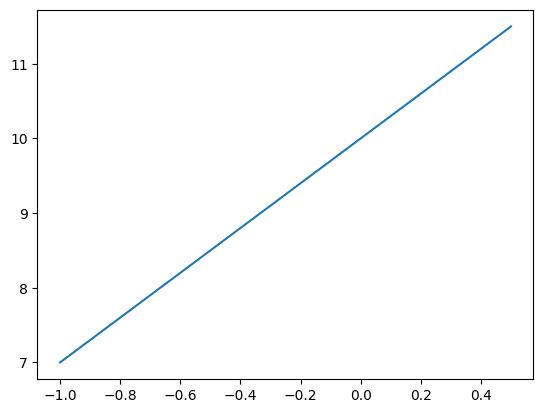

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x.detach().numpy(), y.detach().numpy())

In [ ]:
y.backward(torch.ones_like(y))
display(x.grad)

tensor([3., 3., 3., 3.])

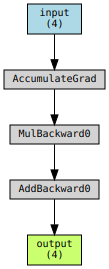

In [ ]:
cg = torchviz.make_dot(y, params = {"input":x, "output":y})

cg.render("graph",view = True)
display(cg)

In [ ]:
y2 = 2*x
y2.backward(torch.ones_like(y2))

display(x.grad)

tensor([5., 5., 5., 5.])

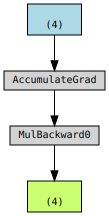

In [ ]:
cg = torchviz.make_dot(y2)
display(cg)

In [ ]:
x = torch.tensor([2.0], requires_grad = True)

In [ ]:
x.requires_grad

True

In [ ]:
def print_ten(x):
  print(f'{x.requires_grad =}\n{x.is_leaf=}\n {x.grad_fn=}\n{x.grad =}')
print_ten(x)

x.requires_grad =True
x.is_leaf=True
 x.grad_fn=None
x.grad =None


In [ ]:
a = 2*x + 10
a.retain_grad()
b = 3*a
b.retain_grad()
c= 2*b
c.retain_grad()

i = torch.sum(c)
display(x)
display(i)

tensor([2.], requires_grad=True)

tensor(84., grad_fn=<SumBackward0>)